<a href="https://colab.research.google.com/github/mhacc001/Python/blob/main/clean_picture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image 'noisy_image_sample.jpg' loaded successfully.

Cleaned color image saved as: cleaned_noisy_image_sample_color_v6.jpg

--- Original Image ---


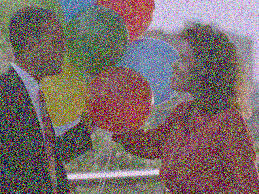


--- Cleaned Color Image (Attempt 6 - Minimal Denoising) ---


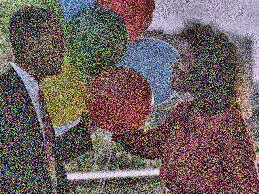

In [11]:
import cv2
import numpy as np
from IPython.display import Image, display # For displaying images directly in Colab output

# --- START OF SCRIPT ---

# Define the path to your downloaded image file.
# Make sure 'noisy_image_sample.jpg' is uploaded to your Colab session's root directory.
image_path = 'noisy_image_sample.jpg'

# 1. Load the image from the specified file path.
try:
    original_image = cv2.imread(image_path)
    if original_image is None:
        raise FileNotFoundError(f"Error: The file '{image_path}' was not found or could not be loaded. "
                                "Please ensure it is uploaded to your Colab session.")
    print(f"Image '{image_path}' loaded successfully.")
except FileNotFoundError as e:
    print(e)
    exit()
except Exception as e:
    print(f"An unexpected error occurred while loading the image: {e}")
    exit()

def process_image_minimal_denoising(image):
    """
    Applies minimal denoising and contrast enhancement to an image, aiming to reduce
    noise without introducing significant blur. This uses the most conservative parameters.

    Args:
        image (numpy.ndarray): The input image (expected in BGR format).

    Returns:
        numpy.ndarray: The processed image with noise reduction and enhanced clarity, in BGR format.
    """
    # Step 1: Denoising with Non-Local Means (using very low strength)
    # We are setting 'h' and 'hColor' to very low values (e.g., 5).
    # This will remove only the very lightest noise, but should preserve details best.
    # This is the most conservative approach with fastNlMeansDenoisingColored.
    denoised_image = cv2.fastNlMeansDenoisingColored(
        image, None,
        h=5,        # Very low strength for luminance component (reduced from 20)
        hColor=5,   # Very low strength for color components (reduced from 20)
        templateWindowSize=7,
        searchWindowSize=21
    )
    # We are explicitly NOT using medianBlur here, as it can cause smoothing.


    # Step 2: Contrast Enhancement using CLAHE (Contrast Limited Adaptive Histogram Equalization).
    # Convert to HSV to work on the 'Value' (brightness) channel.
    hsv_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv_image)

    # Create a CLAHE object with a moderate clipLimit.
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8)) # Kept at 3.0 for good contrast
    cl_v = clahe.apply(v)

    # Merge the enhanced 'Value' channel back.
    merged_hsv = cv2.merge([h, s, cl_v])
    contrast_enhanced_image = cv2.cvtColor(merged_hsv, cv2.COLOR_HSV2BGR)

    return contrast_enhanced_image

# Process the image with the updated function
cleaned_color_image = process_image_minimal_denoising(original_image)

# Define the output filename for this attempt.
output_filename_color = "cleaned_noisy_image_sample_color_v6.jpg"

# Save the processed image
cv2.imwrite(output_filename_color, cleaned_color_image)
print(f"\nCleaned color image saved as: {output_filename_color}")

# --- Displaying Images in Colab ---
print("\n--- Original Image ---")
try:
    display(Image(filename=image_path))
except Exception as e:
    print(f"Could not display original image: {e}")

print("\n--- Cleaned Color Image (Attempt 6 - Minimal Denoising) ---")
try:
    display(Image(filename=output_filename_color))
except Exception as e:
    print(f"Could not display cleaned image: {e}")